
Product Review: The product quality is very good and I am happy

Predicted Review Rating: 4


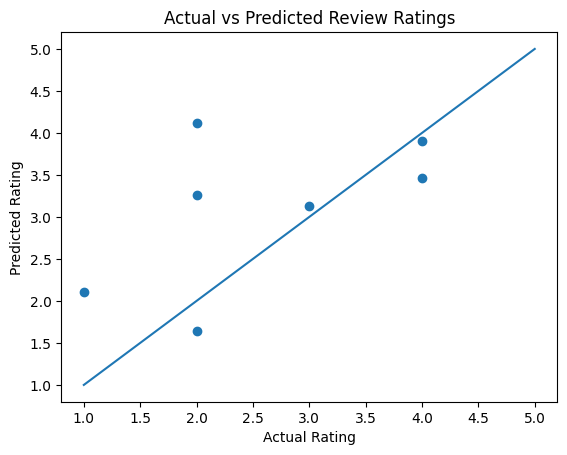

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

df = pd.read_csv("reviews.csv")

X = df["review"]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=1000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LinearRegression()
model.fit(X_train_tfidf, y_train)


user_review = input("Enter a product review: ")
user_review_tfidf = tfidf.transform([user_review])
predicted_rating = model.predict(user_review_tfidf)[0]

predicted_rating = round(predicted_rating)
predicted_rating = max(1, min(5, predicted_rating))
y_pred = model.predict(X_test_tfidf)

print("\nProduct Review:",user_review)
print("\nPredicted Review Rating:",predicted_rating)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([1, 5], [1, 5])
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Review Ratings")
plt.show()
